In [1]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
from fa2 import ForceAtlas2


In [2]:
df_edges = pd.read_csv("csv_outputs/graph_channels_large.csv", sep=';')
display(df_edges.head())


,source,target,weight
0,0,1,12881
1,0,2,8482
2,0,3,20346
3,0,4,14911
4,0,5,4


In [3]:
G = nx.from_pandas_edgelist(df_edges, edge_attr=True)


In [4]:
forceatlas2 = ForceAtlas2(gravity=0.5)
posses = forceatlas2.forceatlas2_networkx_layout(G,iterations=1000)

100%|██████████| 1000/1000 [01:53<00:00,  8.83it/s]

BarnesHut Approximation  took  46.20  seconds
Repulsion forces  took  31.23  seconds
Gravitational forces  took  0.16  seconds
Attraction forces  took  33.11  seconds
AdjustSpeedAndApplyForces step  took  0.85  seconds


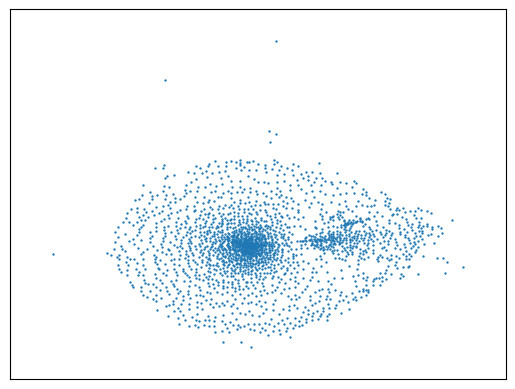

In [5]:
nx.draw_networkx(G, pos=posses, with_labels=False, width=0,node_size=0.5)


In [6]:
louvain_partitions = nx_comm.louvain_communities(G, resolution=0.9, threshold=1e-1,seed=1)
print("We have {nbr}".format(nbr=len(louvain_partitions)))

We have 4


In [7]:
for idx in range(len(louvain_partitions)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_partitions[idx])))

Community number 0 has 20 members
Community number 1 has 509 members
Community number 2 has 825 members
Community number 3 has 779 members


In [12]:
filtered_channels = list(louvain_partitions[2])
filtered_channels = filtered_channels + (list(louvain_partitions[3]))
filtered_channels = sorted(filtered_channels)
filtered_channels_list = filtered_channels
filtered_channels = pd.DataFrame(filtered_channels)
display(filtered_channels.head())

,0
0,6
1,7
2,8
3,9
4,10


In [13]:
filtered_channels.to_csv("csv_outputs/louvain_filtered_channels_large.csv", sep=';', index=False)

In [14]:
def filter_function(n):
    return n in filtered_channels_list

sub_G = nx.subgraph_view(G, filter_node=filter_function)

In [21]:
louvain_communities = nx_comm.louvain_communities(sub_G, resolution=0.99,threshold=1e-1, seed=2)
print("We have detected {num} communities".format(num=len(louvain_communities)))

We have detected 9 communities


In [22]:
for idx in range(len(louvain_communities)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_communities[idx])))

Community number 0 has 391 members
Community number 1 has 107 members
Community number 2 has 152 members
Community number 3 has 10 members
Community number 4 has 742 members
Community number 5 has 184 members
Community number 6 has 12 members
Community number 7 has 4 members
Community number 8 has 2 members


In [31]:
display(louvain_communities[0])

{6,
 7,
 8,
 9,
 10,
 11,
 15,
 16,
 21,
 23,
 29,
 31,
 32,
 37,
 53,
 56,
 61,
 62,
 64,
 67,
 71,
 76,
 77,
 78,
 81,
 82,
 88,
 92,
 93,
 96,
 97,
 120,
 121,
 122,
 136,
 137,
 140,
 142,
 143,
 144,
 147,
 165,
 169,
 173,
 179,
 184,
 191,
 192,
 195,
 200,
 201,
 203,
 205,
 209,
 212,
 215,
 221,
 222,
 246,
 251,
 252,
 256,
 257,
 261,
 264,
 265,
 266,
 267,
 273,
 275,
 276,
 277,
 278,
 280,
 286,
 302,
 304,
 308,
 311,
 313,
 314,
 322,
 326,
 331,
 344,
 355,
 361,
 362,
 374,
 376,
 378,
 379,
 384,
 389,
 390,
 391,
 397,
 401,
 404,
 408,
 412,
 413,
 422,
 428,
 432,
 434,
 438,
 442,
 459,
 463,
 466,
 469,
 472,
 474,
 477,
 483,
 486,
 492,
 498,
 501,
 513,
 515,
 526,
 531,
 534,
 551,
 559,
 561,
 565,
 569,
 582,
 590,
 593,
 603,
 610,
 615,
 622,
 624,
 626,
 627,
 630,
 631,
 634,
 642,
 649,
 651,
 657,
 669,
 674,
 679,
 682,
 683,
 685,
 691,
 692,
 708,
 709,
 714,
 722,
 727,
 728,
 740,
 741,
 744,
 748,
 766,
 769,
 784,
 787,
 801,
 815,
 817,
 82

- 0 classic news
- 1 lean left (mais très buggé)
- 2 far right
- 3 kenya
- 4 youtube spotlight UK, VOA learn english ?
- 5 far right
- 6 is nigeria, african news
- 7 is armenian news
- 8 is music

In [35]:
new_filtered_channels_ls = list(louvain_communities[0])
def filter_function(n):
    return n in new_filtered_channels_ls

In [36]:
sub_sub_G = nx.subgraph_view(sub_G, filter_node=filter_function)

In [47]:
louvain_communities = nx_comm.louvain_communities(sub_sub_G, resolution=1.1,threshold=1e-1, seed=2)
print("We have detected {num} communities".format(num=len(louvain_communities)))

We have detected 8 communities


In [48]:
for idx in range(len(louvain_communities)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_communities[idx])))

Community number 0 has 14 members
Community number 1 has 40 members
Community number 2 has 97 members
Community number 3 has 11 members
Community number 4 has 9 members
Community number 5 has 14 members
Community number 6 has 7 members
Community number 7 has 199 members


In [39]:
display(louvain_communities[0]) ## CNN, TYT (left)

{6,
 23,
 31,
 64,
 67,
 88,
 96,
 137,
 173,
 215,
 246,
 266,
 280,
 308,
 384,
 728,
 1517,
 1577}

In [52]:
display(louvain_communities[1]) # Truly, Inside Edition (lean left)

{7,
 9,
 10,
 15,
 37,
 53,
 61,
 78,
 122,
 200,
 252,
 276,
 314,
 331,
 362,
 391,
 569,
 593,
 744,
 843,
 1020,
 1057,
 1071,
 1095,
 1182,
 1206,
 1311,
 1534,
 1619,
 1726,
 1787,
 1831,
 1876,
 2007,
 2012,
 2015,
 2049,
 2051,
 2054,
 2186}

In [51]:
display(louvain_communities[2]) # Vox, BBC, Vice

{8,
 16,
 21,
 29,
 32,
 56,
 62,
 71,
 76,
 77,
 81,
 82,
 93,
 120,
 121,
 136,
 140,
 144,
 147,
 165,
 169,
 179,
 184,
 192,
 195,
 201,
 203,
 205,
 209,
 212,
 221,
 251,
 256,
 257,
 264,
 265,
 273,
 275,
 277,
 278,
 286,
 302,
 304,
 311,
 355,
 376,
 378,
 379,
 389,
 401,
 404,
 408,
 422,
 432,
 474,
 486,
 492,
 498,
 501,
 513,
 515,
 526,
 565,
 603,
 634,
 649,
 657,
 679,
 685,
 722,
 748,
 787,
 854,
 876,
 880,
 883,
 948,
 957,
 968,
 970,
 1024,
 1081,
 1099,
 1124,
 1170,
 1236,
 1275,
 1360,
 1540,
 1598,
 1643,
 1686,
 1780,
 1996,
 2025,
 2185,
 2200}

In [53]:
display(louvain_communities[3]) # CBC, CBS News National

{92, 261, 266, 267, 280, 326, 384, 390, 801, 921, 1734}

In [54]:
display(louvain_communities[4]) # Philip de Franco, Sourcefed

{11, 97, 459, 627, 815, 1312, 1487, 1731, 1944}

In [55]:
display(louvain_communities[5]) # african Diaspora news channel, lovelyT

{142, 191, 344, 361, 397, 469, 590, 631, 642, 651, 831, 902, 1353, 1746}

In [56]:
display(louvain_communities[6]) # sabc news, eNCA,  --> african news

{222, 322, 472, 483, 682, 840, 909}

In [57]:
display(louvain_communities[7]) # Associated press

{143,
 313,
 374,
 412,
 413,
 428,
 434,
 438,
 442,
 463,
 466,
 477,
 531,
 534,
 551,
 559,
 561,
 582,
 610,
 615,
 622,
 624,
 626,
 630,
 669,
 674,
 683,
 691,
 692,
 708,
 709,
 714,
 727,
 740,
 741,
 766,
 769,
 784,
 817,
 821,
 822,
 839,
 846,
 879,
 886,
 895,
 896,
 904,
 925,
 928,
 931,
 945,
 946,
 969,
 971,
 972,
 976,
 985,
 987,
 995,
 999,
 1006,
 1008,
 1014,
 1021,
 1028,
 1038,
 1039,
 1043,
 1048,
 1050,
 1053,
 1069,
 1078,
 1094,
 1098,
 1110,
 1113,
 1117,
 1122,
 1127,
 1130,
 1132,
 1138,
 1145,
 1157,
 1160,
 1162,
 1167,
 1188,
 1190,
 1207,
 1209,
 1218,
 1224,
 1225,
 1237,
 1238,
 1259,
 1260,
 1263,
 1265,
 1270,
 1272,
 1295,
 1299,
 1305,
 1307,
 1310,
 1316,
 1317,
 1318,
 1322,
 1340,
 1342,
 1343,
 1349,
 1371,
 1378,
 1383,
 1400,
 1403,
 1413,
 1422,
 1424,
 1436,
 1438,
 1444,
 1447,
 1456,
 1467,
 1477,
 1481,
 1489,
 1495,
 1501,
 1507,
 1509,
 1517,
 1523,
 1526,
 1539,
 1544,
 1548,
 1549,
 1552,
 1553,
 1602,
 1605,
 1630,
 1636,
 164